# Diagramma quantile-quantile {#sec-qq-plot}

**Prerequisiti**

**Concetti e Competenze Chiave**

- Comprendere il concetto di diagramma quantile-quantile.
- Sapere svolgere i calcoli "a mano" e usando le funzioni specializzate.

**Preparazione del Notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.integrate import quad
import arviz as az
import seaborn as sns
from scipy.optimize import minimize

In [2]:
seed: int = sum(map(ord, "likelihood"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

L'obiettivo di questo breve capitolo è spiegare il *diagramma quantile-quantile* (QQ-plot) e illustrarne l'utilità come strumento per analizzare visivamente la conformità di un dataset a una distribuzione teorica, in particolare alla distribuzione normale. Il QQ-plot è una tecnica essenziale per chi lavora con dati che si presume seguano una distribuzione specifica, e rappresenta un passaggio cruciale in molte analisi statistiche, soprattutto per verificare l'assunto di normalità.

Nelle analisi statistiche, si parte spesso dall'assunzione che i dati seguano una distribuzione specifica, come la distribuzione normale. Tuttavia, questa ipotesi deve essere verificata. Un QQ-plot permette di:

- *Valutare graficamente la normalità dei dati*: Se i punti nel diagramma seguono approssimativamente una linea retta, i dati possono essere considerati normalmente distribuiti. In caso contrario, il QQ-plot rivela deviazioni dalla normalità, come code pesanti o asimmetrie.
  
- *Identificare outlier*: Gli outlier nei dati saranno visibili come punti che si discostano significativamente dalla linea retta del QQ-plot.
  
- *Confrontare distribuzioni*: Il QQ-plot non si limita solo alla distribuzione normale, ma può essere utilizzato per confrontare la distribuzione del campione con qualsiasi distribuzione teorica, facilitando l'analisi di dati con forme di distribuzione complesse.

Il QQ-plot è costruito tracciando i *quantili del campione* contro i *quantili teorici* di una distribuzione di riferimento. L’interpretazione è piuttosto semplice:

- Se il campione segue la distribuzione teorica, i punti nel QQ-plot si allineano lungo una linea retta di pendenza 1 (e intercetta 0 nel caso di distribuzione normale standardizzata).
- La deviazione dalla linea retta indica differenze nella distribuzione del campione rispetto alla distribuzione teorica:
  - *Intercetta diversa da 0*: indica che la media del campione differisce dalla media della distribuzione teorica.
  - *Pendenza diversa da 1*: indica una differenza nella varianza tra il campione e la distribuzione teorica.
  - *Curve*: indicano deviazioni sistematiche, come code pesanti o distribuzioni asimmetriche.

Il QQ-plot è particolarmente utile nelle seguenti situazioni:

- *Pre-analisi statistica*: Prima di applicare tecniche come la regressione lineare, dove l'assunzione di normalità è cruciale, un QQ-plot permette di diagnosticare la normalità dei residui.
  
- *Verifica della bontà del fit*: Quando si utilizza un modello per stimare la distribuzione di un dataset, il QQ-plot permette di confrontare visivamente quanto il modello si adatti bene ai dati osservati.

- *Identificazione di dati anomali*: Un QQ-plot può evidenziare valori atipici, che potrebbero influenzare negativamente i risultati dell'analisi, permettendo di valutare la necessità di una trasformazione dei dati o di un trattamento degli outlier.

Nel capitolo che segue, costruiremo e analizzeremo QQ-plot per tre casi tipici:

1. *Campione con stessa media e varianza della distribuzione teorica*.
2. *Campione con media diversa ma stessa varianza*.
3. *Campione con media e varianza diverse*.

Simuleremo i dati, li ordineremo, calcoleremo manualmente i quantili teorici e infine utilizzeremo librerie specializzate per replicare e confrontare i risultati. Questo approccio pratico ci permetterà di comprendere a fondo l'utilità e il funzionamento del QQ-plot.

## Comprendere e Costruire un QQ-Plot (Distribuzione Normale)

Un *QQ-plot* (Quantile-Quantile plot) è uno strumento grafico utilizzato per confrontare la distribuzione di un campione con una distribuzione teorica, spesso la distribuzione normale. Il QQ-plot aiuta a visualizzare se un dataset segue una distribuzione specifica, tracciando i quantili del campione contro i quantili della distribuzione teorica.

### Passi per Costruire un QQ-Plot

1. **Ordinare i Dati**: Disporre i dati del campione in ordine crescente.
2. **Determinare i Quantili Teorici**: Per una distribuzione normale, i quantili corrispondono all'inverso della funzione di distribuzione cumulativa (CDF) della distribuzione normale.
3. **Confrontare i Quantili**: Tracciare i quantili del campione rispetto ai quantili della distribuzione teorica. Se il campione proviene dalla distribuzione teorica, i punti dovrebbero trovarsi approssimativamente su una linea retta.

### Caso 1: Campione con Stessa Media e Varianza della Distribuzione Normale

Supponiamo che il campione provenga da una distribuzione normale \( N(\mu = 0, \sigma^2 = 1) \), esattamente come la distribuzione teorica.

### Simulazione dei Dati

Iniziamo simulando un piccolo dataset da \( N(0, 1) \):

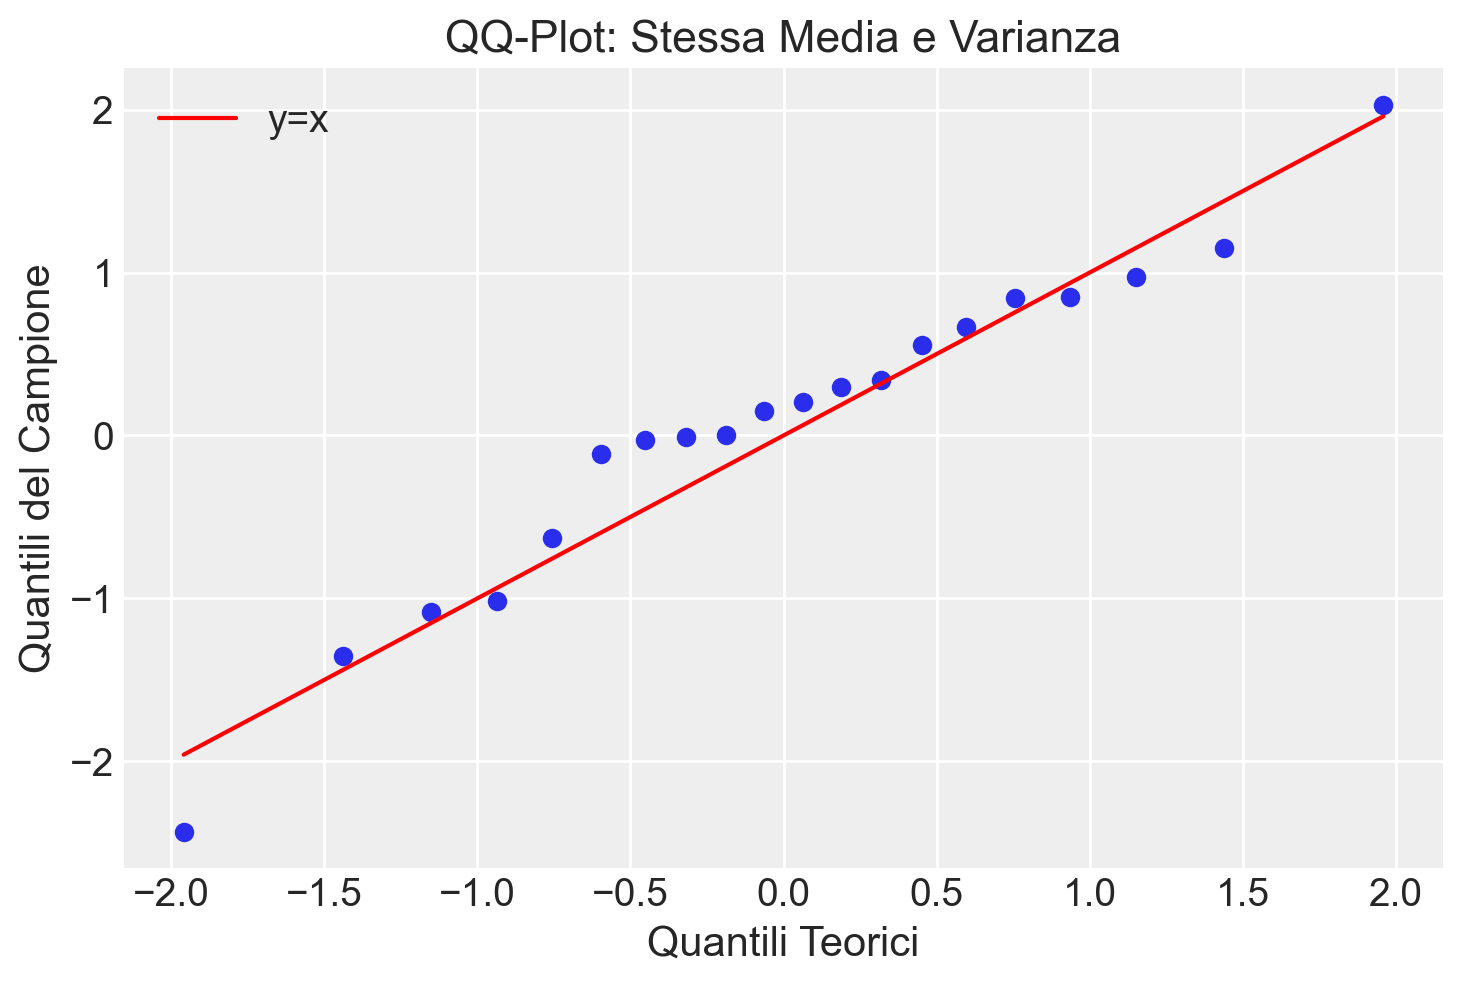

In [3]:
# Generiamo 20 punti dati da N(0, 1)
dati_campione = np.random.normal(0, 1, 20)

# Ordiniamo i dati del campione
campione_ordinato = np.sort(dati_campione)

# Calcoliamo i quantili teorici da N(0, 1)
quantili_teorici = stats.norm.ppf((np.arange(1, 21) - 0.5) / 20)

# Tracciamo il QQ-plot
plt.scatter(quantili_teorici, campione_ordinato)
plt.plot(quantili_teorici, quantili_teorici, color="red", label="y=x")
plt.xlabel("Quantili Teorici")
plt.ylabel("Quantili del Campione")
plt.title("QQ-Plot: Stessa Media e Varianza")
plt.legend()
plt.show()

In questo caso, poiché i dati del campione provengono da \( N(0, 1) \), ci aspettiamo che i punti si allineino con la linea rossa, indicando che la distribuzione del campione corrisponde a quella teorica.

### Caso 2: Campione con Media Diversa (Intercetta ≠ 0)

Adesso, simuliamo un campione da \( N(2, 1) \), ovvero il campione ha una media diversa ma la stessa varianza:

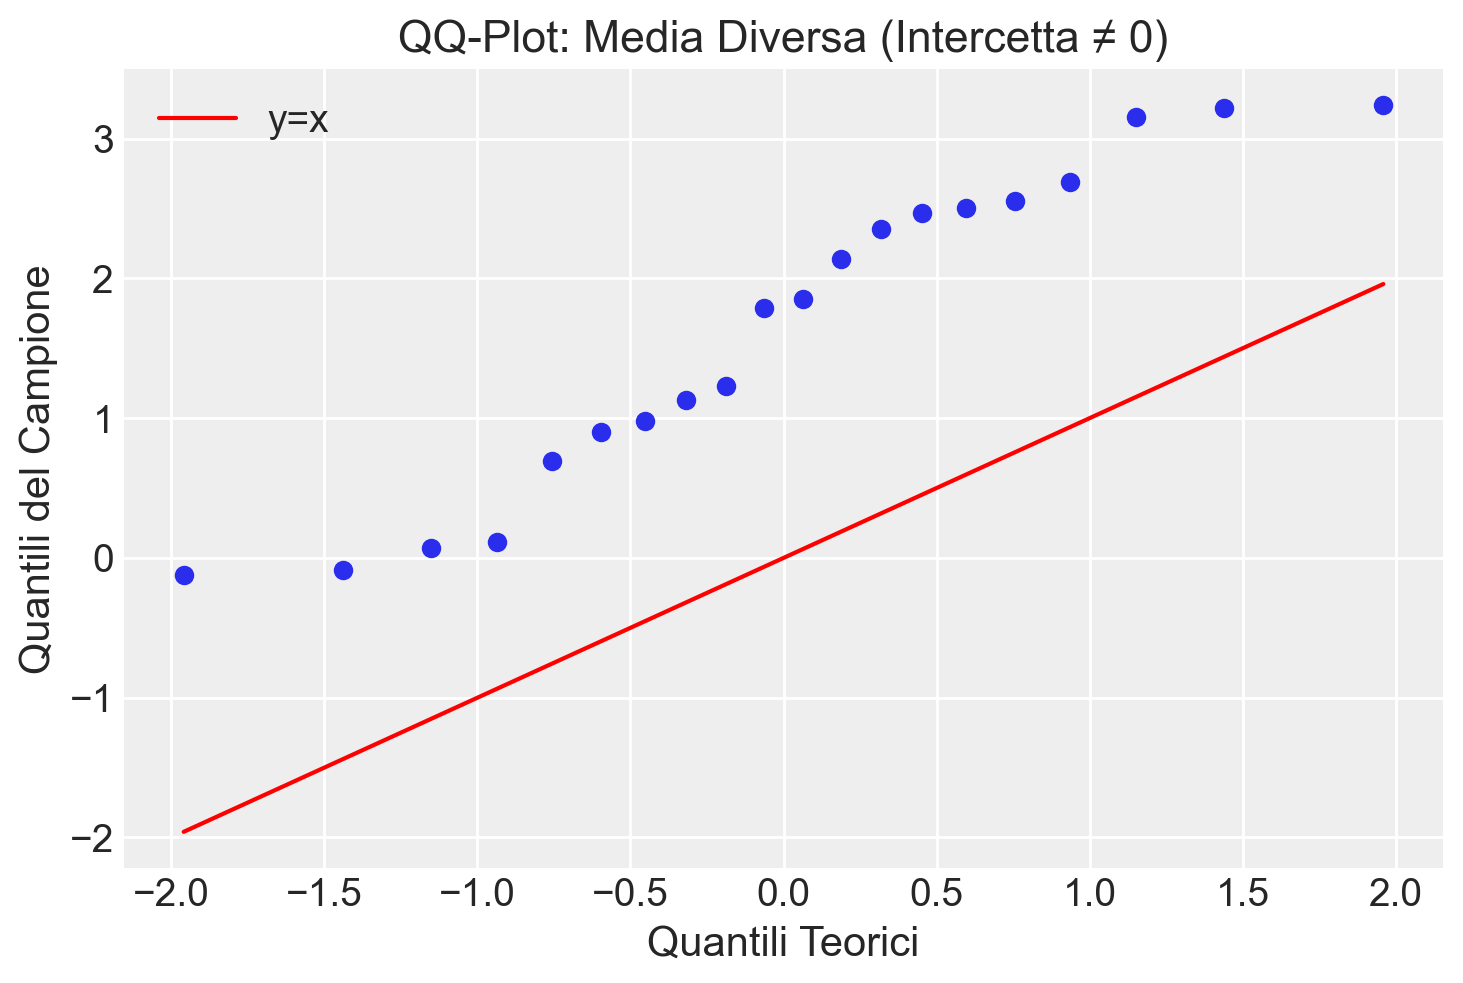

In [4]:
# Generiamo 20 punti dati da N(2, 1)
dati_campione_media_spostata = np.random.normal(2, 1, 20)

# Ordiniamo i dati del campione
campione_ordinato_media_spostata = np.sort(dati_campione_media_spostata)

# Tracciamo il QQ-plot
plt.scatter(quantili_teorici, campione_ordinato_media_spostata)
plt.plot(quantili_teorici, quantili_teorici, color="red", label="y=x")
plt.xlabel("Quantili Teorici")
plt.ylabel("Quantili del Campione")
plt.title("QQ-Plot: Media Diversa (Intercetta ≠ 0)")
plt.legend()
plt.show()

In questo caso, i punti dovrebbero seguire una linea retta ma essere spostati verticalmente, indicando un'intercetta diversa (media).

### Caso 3: Campione con Media e Varianza Diverse (Pendenza ≠ 1)

Infine, simuliamo un campione da \( N(2, 2^2) \), ovvero il campione ha una media e una varianza diverse:

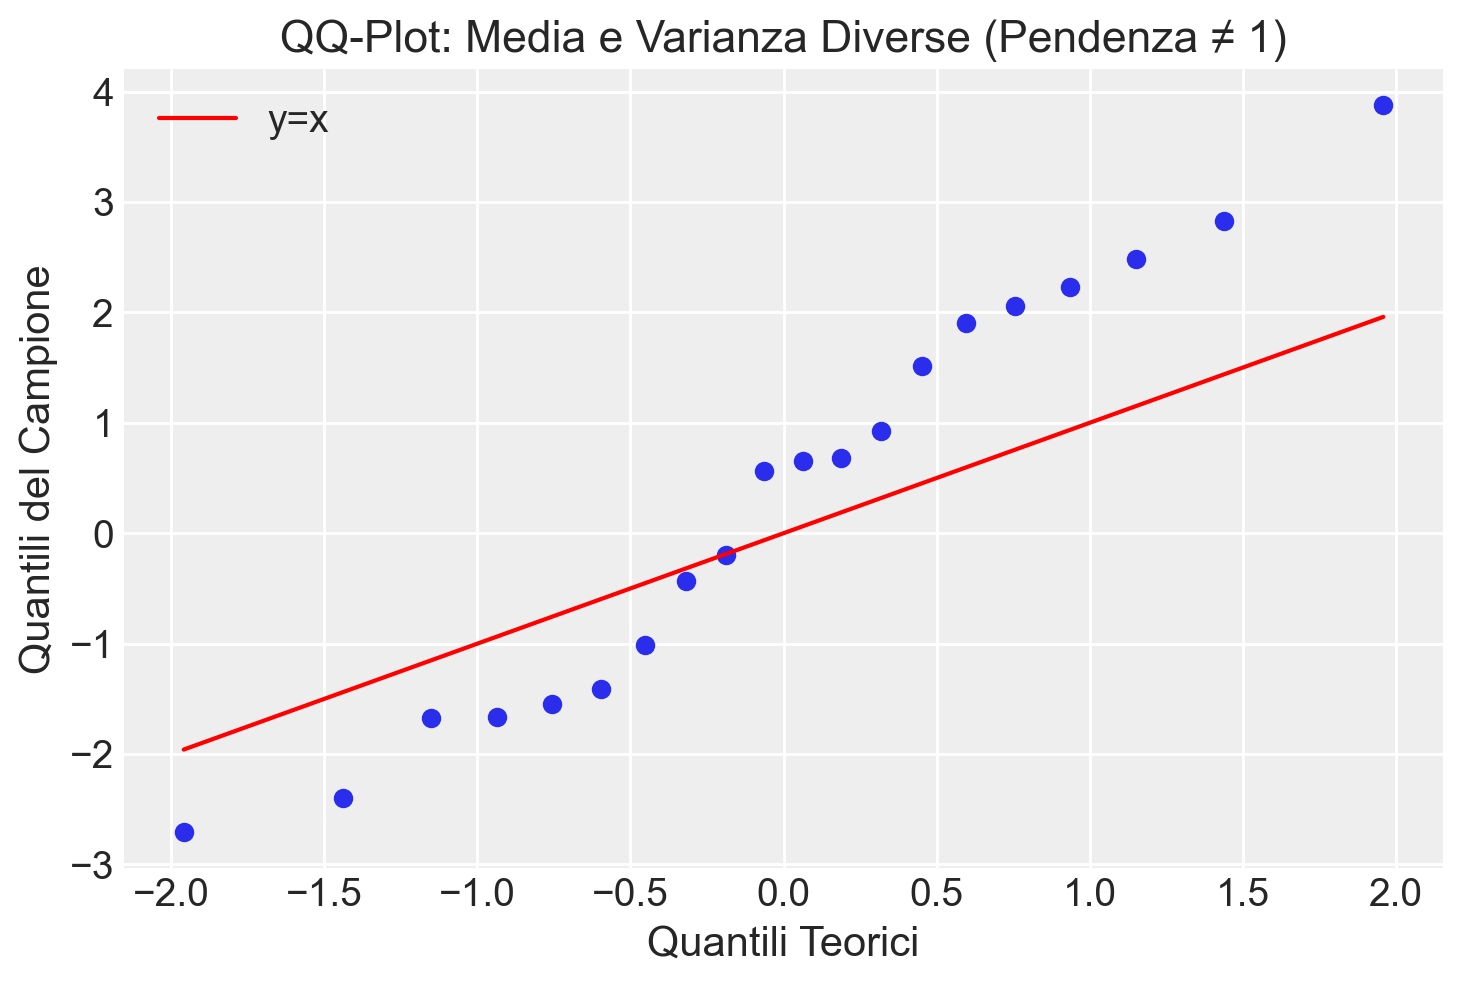

In [5]:
# Generiamo 20 punti dati da N(2, 2)
dati_campione_varianza_spostata = np.random.normal(2, 2, 20)

# Ordiniamo i dati del campione
campione_ordinato_varianza_spostata = np.sort(dati_campione_varianza_spostata)

# Tracciamo il QQ-plot
plt.scatter(quantili_teorici, campione_ordinato_varianza_spostata)
plt.plot(quantili_teorici, quantili_teorici, color="red", label="y=x")
plt.xlabel("Quantili Teorici")
plt.ylabel("Quantili del Campione")
plt.title("QQ-Plot: Media e Varianza Diverse (Pendenza ≠ 1)")
plt.legend()
plt.show()

In questo caso, i punti si discosteranno sia verticalmente (per la media diversa) sia rispetto alla pendenza della linea (per la varianza diversa). La maggiore varianza farà sì che i punti siano più dispersi rispetto alla linea teorica.

### Calcolo Manuale del QQ-Plot

Per ciascun caso sopra, abbiamo eseguito i seguenti passaggi manualmente:

1. **Ordinato i dati del campione**: Questo ci dà i quantili del campione.
2. **Calcolato i quantili teorici**: Utilizzando la funzione percentuale inversa (`ppf`) per la distribuzione normale.

Possiamo calcolare i quantili teorici senza usare librerie specializzate:

In [7]:
# Calcolo manuale dei quantili utilizzando l'inversa della CDF per una distribuzione normale
def quantili_teorici_manuali(n):
    return [stats.norm.ppf((i - 0.5) / n) for i in range(1, n + 1)]


n = len(dati_campione)
quantili_teorici_manuali = quantili_teorici_manuali(n)

### Utilizzo di Funzioni Specializzate per Replicare i Risultati

Possiamo replicare i QQ-plot sopra utilizzando la funzione `probplot` di `scipy.stats`:

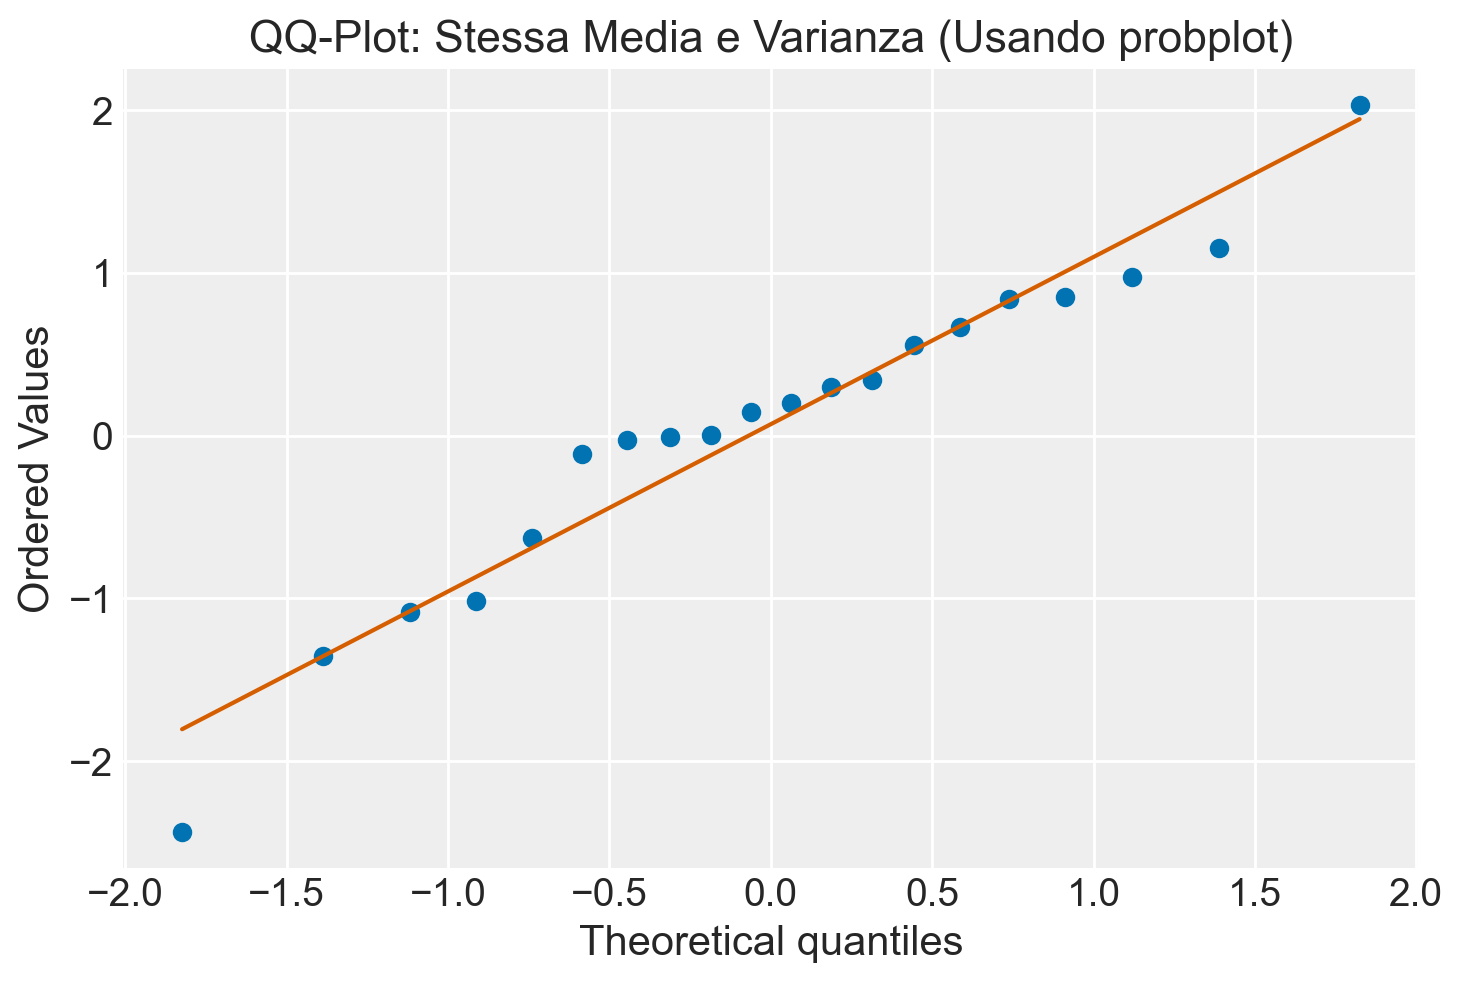

In [8]:
# Generazione del QQ-plot utilizzando probplot
stats.probplot(dati_campione, dist="norm", plot=plt)
plt.title("QQ-Plot: Stessa Media e Varianza (Usando probplot)")
plt.show()

Allo stesso modo, possiamo ripetere per i casi di media e varianza spostate.

## Conclusione

Questo tutorial mostra come costruire manualmente un QQ-plot e interpretarlo in diversi casi che coinvolgono variazioni nella media e nella varianza del campione.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [1]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Thu Sep 12 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

Watermark: 2.4.3

